In [1]:
setwd("~/Upd-Germline-Genomics")
source("_targets.R")

Loading required package: viridisLite


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [5]:
tar_load(
  c(
    matches("^chic.experiment.quantify_H3K(4|27|9)_(Germline|Somatic)_peakcalling.broad_chr$"),
    chic.tile.diameter_500_score_chr,
    repli.peaks_chr
  )
)

In [3]:
head(chic.experiment.quantify_H3K4_Germline_peakcalling.broad_chr)

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:dplyr’:

    first, rename


The following object is masked from ‘package:utils’:

    fin

GRanges object with 6 ranges and 9 metadata columns:
      seqnames    ranges strand | score.molH3 score.molH3K4me3  score.R1
         <Rle> <IRanges>  <Rle> |   <numeric>        <numeric> <numeric>
  [1]       2L     1-300      * |           0                0         1
  [2]       2L     1-400      * |           0                0         1
  [3]       2L     1-500      * |           0                0         1
  [4]       2L   101-600      * |           0                0         1
  [5]       2L   201-700      * |           0                0         1
  [6]       2L   301-800      * |           0                0         1
         p_peak        L2FC  logMu_H3 logMu_H3K4me3     se_H3 se_H3K4me3
      <numeric>   <numeric> <numeric>     <numeric> <numeric>  <numeric>
  [1]         1 2.80412e-09       -28           -28    140311     261555
  [2]         1 2.10310e-09       -28           -28    121513     226513
  [3]         1 4.74025e-09       -29           -29    179190     33403

In [4]:
repli.peaks_chr[[1]]

GRanges object with 535 ranges and 2 metadata columns:
                                                               seqnames
                                                                  <Rle>
                                2L.GermlineLater                     2L
                            2L.GermlineEarlier.1                     2L
                            2L.GermlineEarlier.2                     2L
                            2L.GermlineEarlier.3                     2L
                              2L.GermlineLater.4                     2L
                                             ...                    ...
  Y_mapped_Scaffold_20_D1762_D1719.GermlineLater Y_mapped_Scaffold_20..
  Y_mapped_Scaffold_21_D1683_D1693.GermlineLater Y_mapped_Scaffold_21..
                            rDNA.GermlineEarlier                   rDNA
                   211000022278415.GermlineLater        211000022278415
                   211000022278049.GermlineLater        211000022278049
         

In [6]:
head(chic.tile.diameter_500_score_chr)

GRanges object with 6 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]       2L     1-100      *
  [2]       2L   101-200      *
  [3]       2L   201-300      *
  [4]       2L   301-400      *
  [5]       2L   401-500      *
  [6]       2L   501-600      *
  -------
  seqinfo: 1870 sequences from an unspecified genome

In [9]:
write(deparse(names(chr.lengths)), stdout())

c("2L", "2R", "3L", "3R", "4", "X", "Y")


In [39]:
peaks <- repli.peaks_chr[[1]] %>%
  subset(seqnames %in% c("2L", "2R", "3L", "3R", "4", "X", "Y"))
match_peaks <- findOverlaps(peaks, chic.tile.diameter_500_score_chr)
Y <- tribble(
  ~mark, ~celltype, ~track,
  "H3K4me3", "Germline", chic.experiment.quantify_H3K4_Germline_peakcalling.broad_chr,
  "H3K4me3", "Somatic", chic.experiment.quantify_H3K4_Somatic_peakcalling.broad_chr,
  "H3K27me3", "Germline", chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr,
  "H3K27me3", "Somatic", chic.experiment.quantify_H3K27_Somatic_peakcalling.broad_chr,
  "H3K9me3", "Germline", chic.experiment.quantify_H3K9_Germline_peakcalling.broad_chr,
  "H3K9me3", "Somatic", chic.experiment.quantify_H3K9_Somatic_peakcalling.broad_chr,
) %>%
  mutate(
    mark = mark %>% factor(unique(.)),
  ) %>%
  group_by(mark, celltype) %>%
  reframe(
    tibble(
      category = ifelse(grepl("GermlineEarlier", names(peaks)), "GSC Earlier", "CySC Earlier") %>%
        factor(c("GSC Earlier", "CySC Earlier")),
      L2FC = track[[1]]$L2FC[to(match_peaks)] %>%
        split(from(match_peaks)) %>%
        sapply(mean)
    )
  ) %>%
  print()

# A tibble: 3,150 × 4
   mark    celltype category       L2FC
   <fct>   <chr>    <fct>         <dbl>
 1 H3K4me3 Germline CySC Earlier 0.0744
 2 H3K4me3 Germline GSC Earlier  0.328 
 3 H3K4me3 Germline GSC Earlier  0.111 
 4 H3K4me3 Germline GSC Earlier  0.126 
 5 H3K4me3 Germline CySC Earlier 0.0454
 6 H3K4me3 Germline GSC Earlier  0.216 
 7 H3K4me3 Germline GSC Earlier  0.0894
 8 H3K4me3 Germline GSC Earlier  0.0934
 9 H3K4me3 Germline GSC Earlier  0.0299
10 H3K4me3 Germline CySC Earlier 0.0589
# ℹ 3,140 more rows


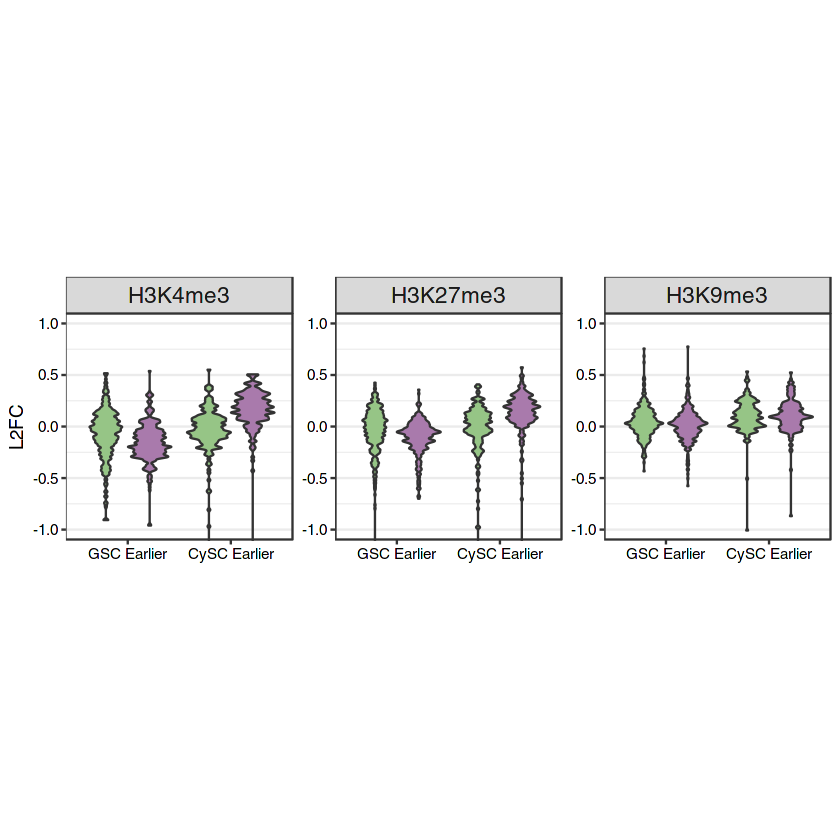

In [ ]:
library(egg)
library(ggplot2)
n <- 512
ggplot(
  subset(Y, between(L2FC, -2, 2)),
  aes(category, L2FC, fill=celltype)
) +
  geom_violin(bw = 4 / n * 4, width = 0.85) +
  facet_wrap(vars(mark), scales = "free") +
  scale_fill_manual(values = cell_type_violin_colors) +
  coord_cartesian(NULL, c(-1, 1)) +
  labs(x = NULL) +
  theme(
    aspect.ratio = 1,
    legend.position = "none",
    panel.grid.major.x = element_blank(),
  )
ggsave("illustrations/Enriched-Chromatin-Diff-Timing.pdf", set_panel_size(last_plot(), w=unit(2, "in"), h = unit(2, "in")), w=8, h=4)